<a href="https://colab.research.google.com/github/gittEze/KNearestNeighbors_CancerWisconsinDiagnostic/blob/main/Clasificaci%C3%B3n_de_tumores_con_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

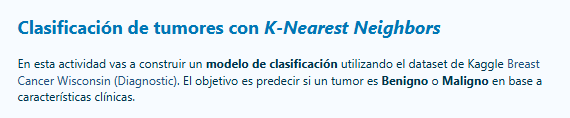

In [47]:
import pandas as pd
df = pd.read_csv('data.csv')

df.info(5)
df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


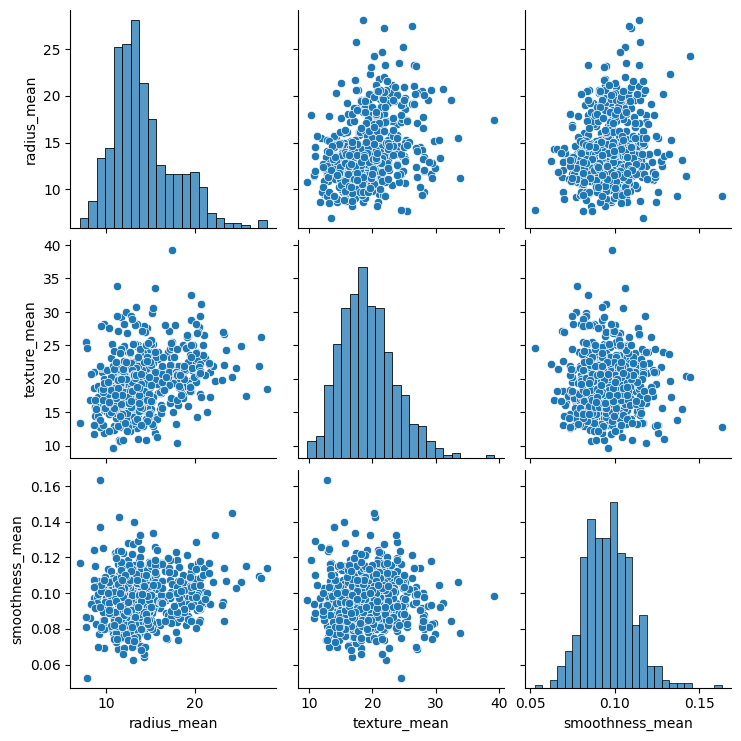

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['radius_mean', 'texture_mean', 'smoothness_mean']
sns.pairplot(df[cols])
plt.show()

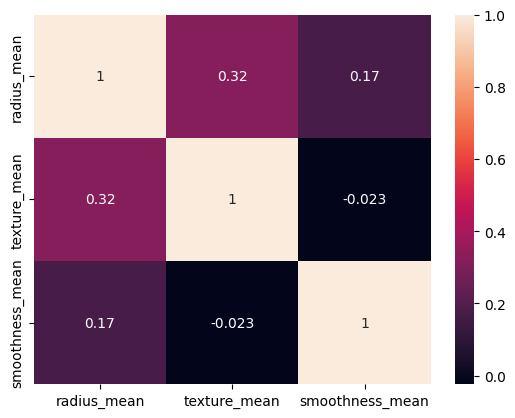

In [49]:
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

x = df[['radius_mean', 'texture_mean', 'smoothness_mean']]
y = df['diagnosis'].replace({'B': 0, 'M': 1})

scaler = StandardScaler()

XScaled = scaler.fit_transform(x)

kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(XScaled, y.values.ravel())

/tmp/ipython-input-1186698988.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['diagnosis'].replace({'B': 0, 'M': 1})


KNeighborsClassifier(n_neighbors=3)

In [55]:
#17.99	10.38	0.11840
#13.540	14.36	0.09779

radiusMean = float(input("Ingrese el valor de radius_mean: "))
textureMean = float(input("Ingrese el valor de texture_mean: "))
smoothnessMean = float(input("Ingrese el valor de smoothness_mean: "))

arrayInput = [[radiusMean, textureMean, smoothnessMean]]
arrayInputScaler = scaler.transform(arrayInput)
outputt = kn.predict(arrayInputScaler)

if outputt[0] == 0:
    print("El diagnóstico es: Benigno")
else:
    print("El diagnóstico es: Maligno")

Ingrese el valor de radius_mean: 17.99
Ingrese el valor de texture_mean: 10.38
Ingrese el valor de smoothness_mean: 0.11840
El diagnóstico es: Maligno


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


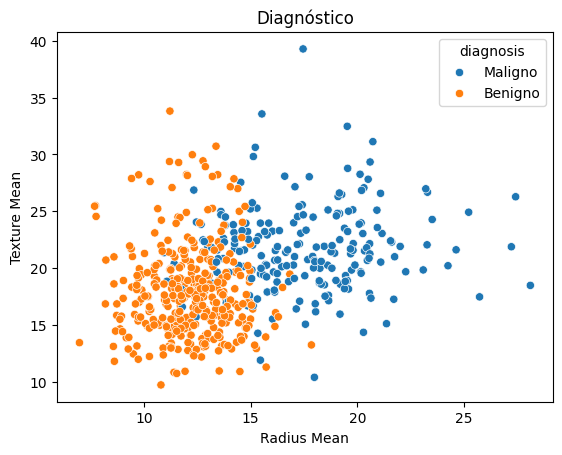

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
sb.scatterplot(
    data=df,
    x="radius_mean",
    y="texture_mean",
    hue=df['diagnosis'].replace({'B': 'Benigno', 'M': 'Maligno'})
)
plt.title("Diagnóstico")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend(title="diagnosis")
plt.show()

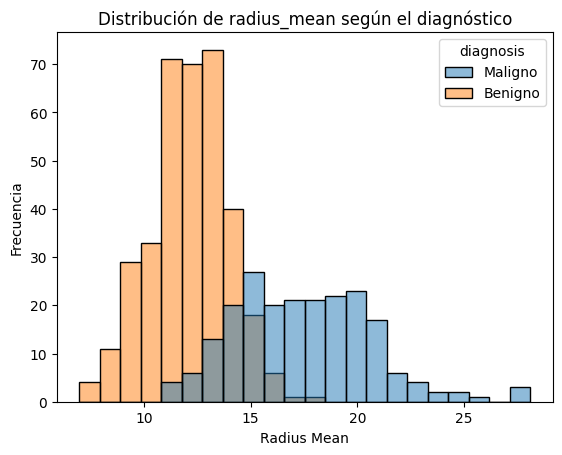

In [56]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
sb.histplot(
    data=df,
    x="radius_mean",
    hue=df['diagnosis'].replace({'B': 'Benigno', 'M': 'Maligno'})
)
plt.title("Distribución de radius_mean según el diagnóstico")
plt.xlabel("Radius Mean")
plt.ylabel("Frecuencia")
plt.show()